In [1]:
import numpy as np
import pandas as pd
import string
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline  

In [44]:
import seaborn as sns

In [2]:
#!pip install --user spacy

In [3]:
import spacy

In [4]:
#!python -m spacy download en_core_web_sm
from spacy.lang.en.stop_words import STOP_WORDS
import string

In [5]:
data = pd.read_csv(r"D:\YUKTA\Assignment\DS\NLP\blogs.csv")

In [6]:
data.head()

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


# EDA:

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [8]:
data.shape

(2000, 2)

In [9]:
data.describe()

,Data,Labels
count,2000,2000
unique,2000,20
top,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
freq,1,100


In [10]:
data.isnull().sum()

Data      0
Labels    0
dtype: int64

**The data has no missing values.**

In [11]:
data['Labels'].value_counts()

Labels
alt.atheism                 100
comp.graphics               100
talk.politics.misc          100
talk.politics.mideast       100
talk.politics.guns          100
soc.religion.christian      100
sci.space                   100
sci.med                     100
sci.electronics             100
sci.crypt                   100
rec.sport.hockey            100
rec.sport.baseball          100
rec.motorcycles             100
rec.autos                   100
misc.forsale                100
comp.windows.x              100
comp.sys.mac.hardware       100
comp.sys.ibm.pc.hardware    100
comp.os.ms-windows.misc     100
talk.religion.misc          100
Name: count, dtype: int64

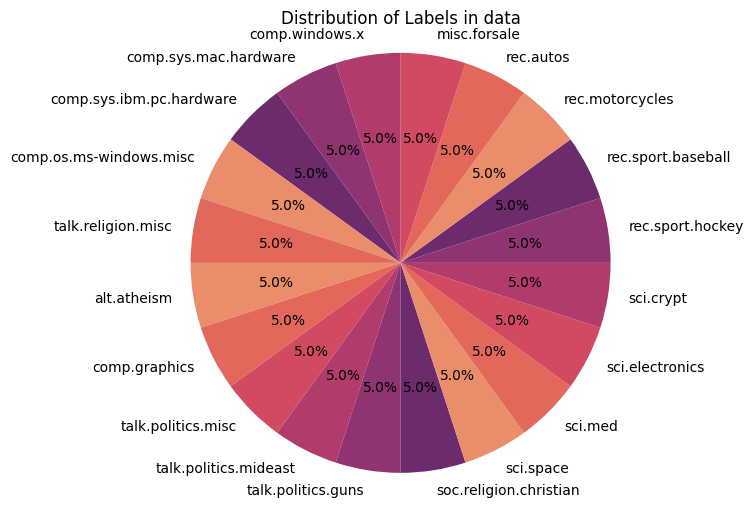

In [48]:
lab_counts = data['Labels'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(lab_counts, labels=lab_counts.index, autopct='%1.1f%%', startangle=180,
       colors=sns.color_palette('flare'))
plt.title('Distribution of Labels in data')
plt.axis('equal') 
plt.show()

**Here we can say that there are 100 blog posts for each Label category.**

**Preprocessing the data:**

In [12]:
# Load the spacy model
nlp = spacy.load('en_core_web_sm')

In [13]:
# Define a function to preprocess the text
def preprocess_text(text):
    # Remove punctuation and convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation)).lower()
    
    # Tokenize and remove stopwords
    doc = nlp(text)
    tokens = [token.text for token in doc if token.text not in STOP_WORDS]
    
    return ' '.join(tokens)

In [14]:
# Apply the preprocessing function to the 'Data' column
data['Cleaned_Data'] = data['Data'].apply(preprocess_text)

In [15]:
data.head()

,Data,Labels,Cleaned_Data
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,path cantaloupesrvcscmuedumagnesiumclubcccmued...
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,newsgroups altatheism \n path cantaloupesrvcsc...
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,path cantaloupesrvcscmuedudasnewsharvardedunoc...
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,path cantaloupesrvcscmuedumagnesiumclubcccmued...
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,xref cantaloupesrvcscmuedu altatheism53485 tal...


**Feature Extraction using TF-IDF:**

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
tfidf = TfidfVectorizer()

In [18]:
X = tfidf.fit_transform(data['Cleaned_Data'])

In [20]:
y = data['Labels']

# Train-Test splitting:

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Naive Bayes Classifier:

In [27]:
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [24]:
nb = MultinomialNB()

In [25]:
nb.fit(X_train, y_train)

MultinomialNB()

In [26]:
y_pred = nb.predict(X_test)

**Evaluating the model:**

In [57]:
from sklearn.metrics import confusion_matrix

In [58]:
cm = confusion_matrix(y_test, y_pred)

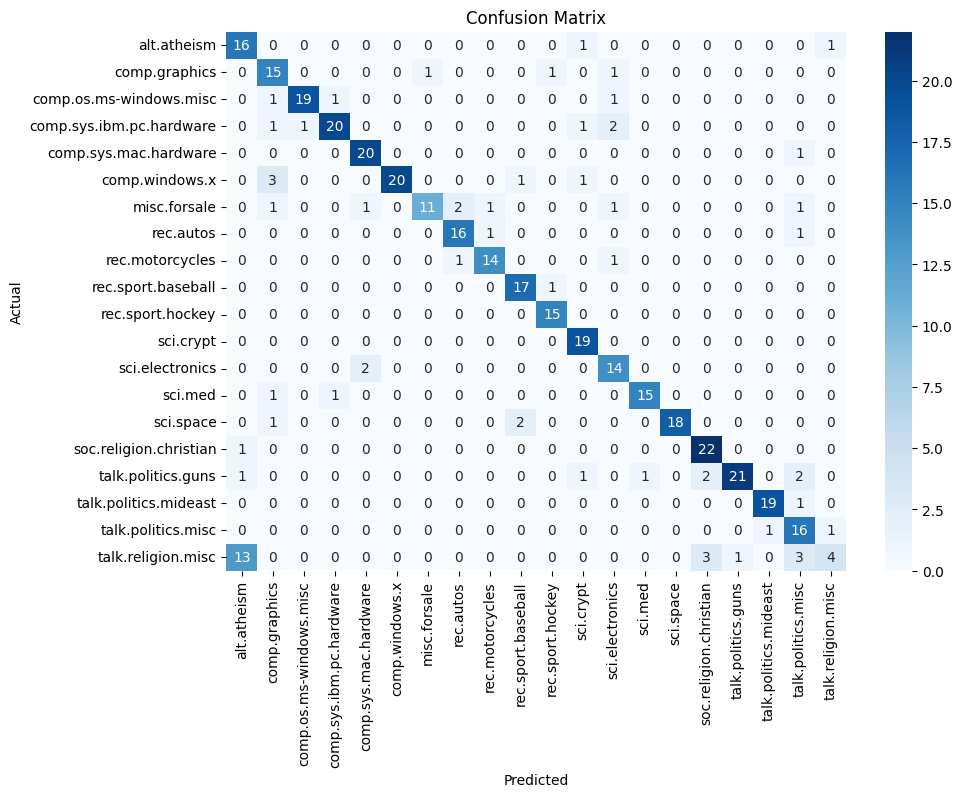

In [59]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [32]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [50]:
print('Evaluation results are:\n')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Evaluation results are:

Accuracy: 0.8275
Precision: 0.8448298745108339
Recall: 0.8275
F1 Score: 0.8184627093686513


# Conclusion:

1) **Accuracy of 0.8275** indicates that approximately 82.75% of the blog posts were correctly classified into their respective categories.

2) **Precision of 84.48%** means that when the model predicted a certain category, it was correct 84.48% of the time. High precision indicates that the model has a low false-positive rate.

3) **Recall of 82.75%** shows that the model successfully identified 82.75% of the actual instances of each category. This reflects the model's ability to capture the relevant blog posts for each category.

**The Naive Bayes classifier demonstrates strong performance with high accuracy, precision, recall, and F1 score.**

# Sentiment Analysis:

In [35]:
#pip install textblob

In [36]:
from textblob import TextBlob

In [37]:
# Define a function to classify the sentiment
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment_score = blob.sentiment.polarity
    if sentiment_score > 0:
        return 'positive'
    elif sentiment_score < 0:
        return 'negative'
    else:
        return 'neutral'

In [38]:
data['Sentiment'] = data['Cleaned_Data'].apply(get_sentiment)

In [40]:
data.head()

,Data,Labels,Cleaned_Data,Sentiment
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,path cantaloupesrvcscmuedumagnesiumclubcccmued...,positive
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,newsgroups altatheism \n path cantaloupesrvcsc...,negative
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,path cantaloupesrvcscmuedudasnewsharvardedunoc...,positive
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,path cantaloupesrvcscmuedumagnesiumclubcccmued...,positive
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,xref cantaloupesrvcscmuedu altatheism53485 tal...,positive


In [41]:
# Examine the distribution of sentiments
sentiment_distribution = data['Sentiment'].value_counts()
print('Sentiment Distribution:')
print(sentiment_distribution)

Sentiment Distribution:
Sentiment
positive    1380
negative     619
neutral        1
Name: count, dtype: int64


So the data has only one neutral statement. Whereas maximum number of statments are positive.

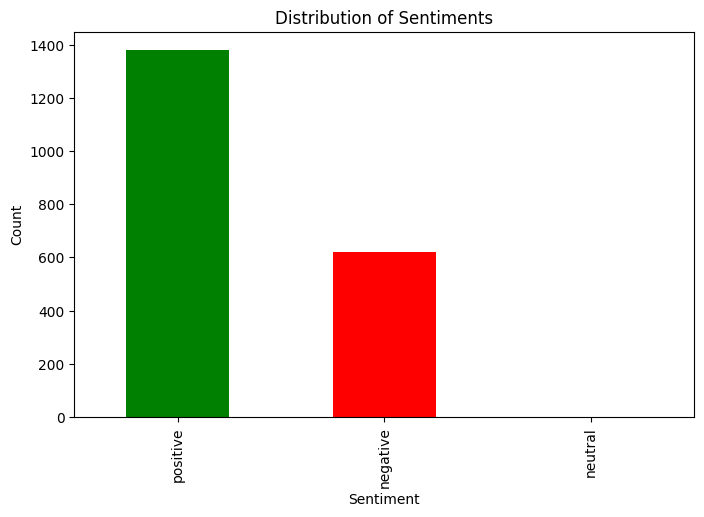

In [60]:
# Plot the distribution of sentiments
plt.figure(figsize=(8, 5))
data['Sentiment'].value_counts().plot(kind='bar', color=['green', 'red', 'blue'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiments')
plt.show()

In [49]:
# Examine the distribution of sentiments across different categories
category_sentiment_distribution = data.groupby('Labels')['Sentiment'].value_counts(normalize=True).unstack().fillna(0)
print('Category Sentiment Distribution:\n')
print(category_sentiment_distribution)

Category Sentiment Distribution:

Sentiment                 negative  neutral  positive
Labels                                               
alt.atheism                   0.39     0.00      0.61
comp.graphics                 0.30     0.00      0.70
comp.os.ms-windows.misc       0.25     0.00      0.75
comp.sys.ibm.pc.hardware      0.26     0.00      0.74
comp.sys.mac.hardware         0.25     0.00      0.75
comp.windows.x                0.27     0.01      0.72
misc.forsale                  0.24     0.00      0.76
rec.autos                     0.27     0.00      0.73
rec.motorcycles               0.30     0.00      0.70
rec.sport.baseball            0.39     0.00      0.61
rec.sport.hockey              0.44     0.00      0.56
sci.crypt                     0.20     0.00      0.80
sci.electronics               0.28     0.00      0.72
sci.med                       0.34     0.00      0.66
sci.space                     0.30     0.00      0.70
soc.religion.christian        0.33     0.00     

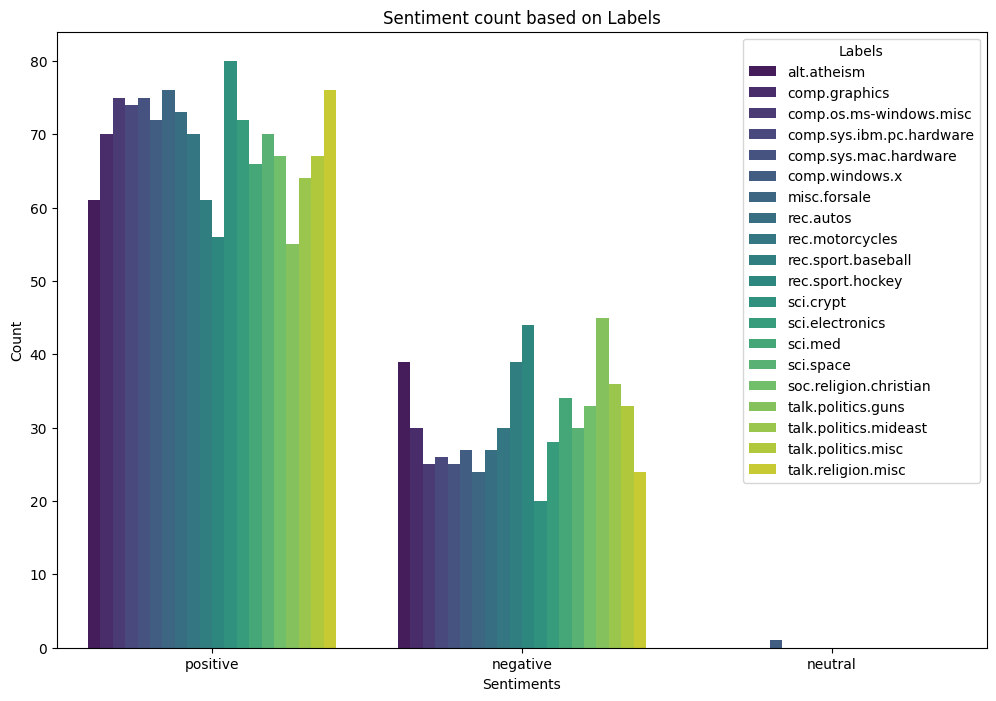

In [47]:
plt.figure(figsize=(12, 8))
sns.countplot(data=data, x='Sentiment', hue='Labels', palette = 'viridis')
plt.xlabel('Sentiments')
plt.ylabel('Count')
plt.title('Sentiment count based on Labels')
plt.show()

**WordCloud:**

In [53]:
#pip install wordcloud

In [52]:
from wordcloud import WordCloud

In [54]:
all_text = ' '.join(data['Cleaned_Data'])

In [55]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

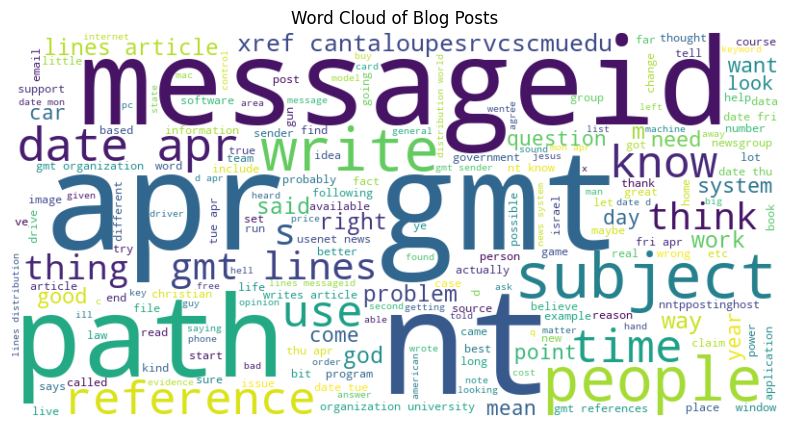

In [56]:
# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Blog Posts')
plt.show()